THE SPARKS FOUNDATION

BATCH : GRIPFEB22

AUTHOR - ARISH KHAN

DATA SCIENCE AND BUSINESS ANYLTICS INTERN

TASK-1 Prediction using Supervised ML
Dataset of task 1: http://bit.ly/w-data

This is the model that basically predicts the percentage of student based on the study hours the student take to achieve score.....

Prediction using supervised ML

In [22]:
# IMPORTING THE LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
%matplotlib inline

In [23]:
# Reading data from remote link
url = "http://bit.ly/w-data"
dt = pd.read_csv(url)
# select only 2 rows as limit is set
dt

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [24]:
dt.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [25]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [26]:
#positive correlation
dt.corr(method = "pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


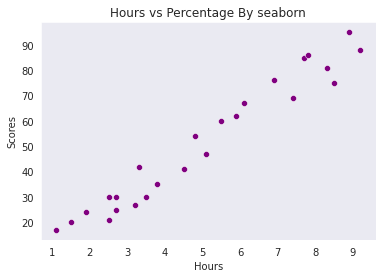

In [28]:
# Plot data and a linear regression model fit.
# set plot style
sns.set_style(style = 'dark')
# drawing scatter plot
plt.title('Hours vs Percentage By seaborn') 
sns.scatterplot( x = dt['Hours'] , y = dt['Scores'], color = 'purple')

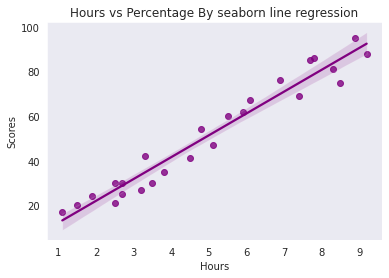

In [29]:
# Plot data and a linear regression model fit.
plt.title('Hours vs Percentage By seaborn line regression') 
sns.regplot( x = dt['Hours'] , y = dt['Scores'], color = 'purple')

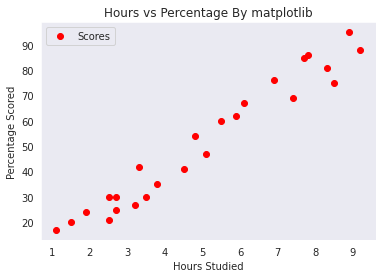

In [30]:
# Plotting the distribution of scores
dt.plot(x='Hours', y='Scores', style='o', color = 'r')  
plt.title('Hours vs Percentage By matplotlib')   
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

# Dividing the Values in X (input) and Y (Output)

In [31]:
# Hours columns in X
X = dt.iloc[:, :-1].values 
# Scores column in y
y = dt.iloc[:, 1].values   

# Splitting the Dataset into training and testing

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size= 0.7, random_state=0) 

# Training the model by feeding the Dataset

In [33]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training successfully done.")

Training successfully done.


In [34]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

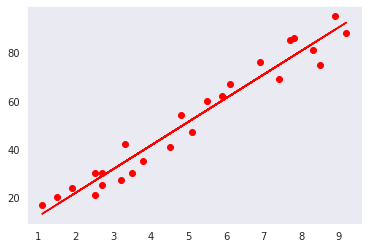

In [35]:
# Plotting for the test data
plt.scatter(X, y, color= 'r')
plt.plot(X, line, color = 'r');
plt.show()

In [36]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [37]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual scores': y_test, 'Predicted scores': y_pred})
print(df,'\n' + '\n' + str(dt['Hours']))

   Actual scores  Predicted scores
0             20         17.053665
1             27         33.694229
2             69         74.806209
3             30         26.842232
4             62         60.123359
5             35         39.567369
6             24         20.969092
7             86         78.721636 

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64


In [50]:
# You can also test with your own data
hours = [10]
own_pred = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
print("\nthat means If a student studies for {} hours per day he/she will score {} % in exam.".format(hours,own_pred))

No of Hours = [10]
Predicted Score = 100.25648224983233

that means If a student studies for [10] hours per day he/she will score [100.25648225] % in exam.


 # Visualizing the Training set result


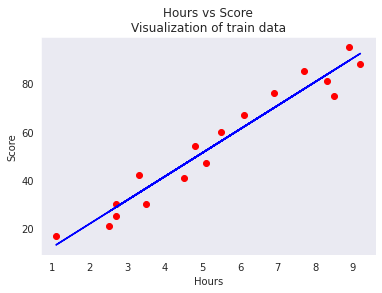

In [39]:
# Visualizing the Training set results
viz_train = plt
# ploting the training dataset in scattered graph
viz_train.scatter(X_train, y_train, color='red')
# ploting the testing dataset in line
viz_train.plot(X_train, regressor.predict(X_train), color='blue')
viz_train.title('Hours vs Score' + '\n' + 'Visualization of train data' )
# labeling the input and outputs
viz_train.xlabel('Hours')
viz_train.ylabel('Score')
# showing the graph
viz_train.show()

# Visualizing the Test set results



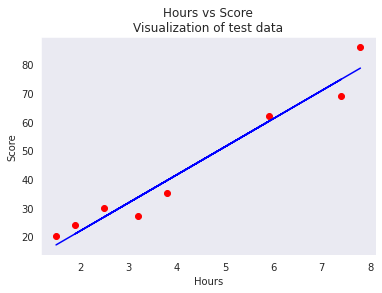

In [40]:
# Visualizing the Test set results
viz_test = plt
# red dot colors for actual values
viz_test.scatter(X_test, y_test, color='red')
# Blue line for the predicted values
viz_test.plot(X_test, regressor.predict(X_test), color='blue')
# defining the title
viz_test.title('Hours vs Score' + '\n' + 'Visualization of test data' )
# x lable
viz_test.xlabel('Hours')
# y label
viz_test.ylabel('Score')
# showing the graph
viz_test.show()

#EVALUATION OF THE MODEL


In [51]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test,y_pred))

Mean Absolute Error: 4.419727808027651
R2 Score: 0.9568211104435257
